# Restaurant Industry Consulting Firm
July 15, 2019<br>
Ngoc, EDA & Inferential Statistics

-----------------

In this notebook, we want to:
- Find 2 most popular cuisines in each area (DC, VA, and MD) then t-test to figure out which one is best in each area (vs. number of reviews)
- Over night (vs. number of reviews, stars)

-------------------

## Import Needed Libraries

In [1]:
import json
import requests
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

## Load Needed Data

In [2]:
df = pd.read_pickle("data/df_business_details.pkl")

Quick glance:

In [3]:
print(len(df))
df.head()

6754


,alias,categories,coordinates,display_phone,hours,id,image_url,is_claimed,is_closed,location,messaging,name,phone,photos,price,rating,review_count,special_hours,transactions,url
0,not-your-average-joes-silver-spring-2,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...","{'latitude': 38.9973970530383, 'longitude': -7...",(240) 839-3400,"[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,https://s3-media3.fl.yelpcdn.com/bphoto/mZpusp...,True,False,"{'address1': '8661 Colesville Rd', 'address2':...",{'url': 'https://www.yelp.com/raq/not-your-ave...,Not Your Average Joe's,+12408393400,[https://s3-media3.fl.yelpcdn.com/bphoto/mZpus...,$$,3.5,372,NaN,[],https://www.yelp.com/biz/not-your-average-joes...
1,california-pizza-kitchen-at-tysons-corner-mcle...,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 38.9195057726529, 'longitude': -7...",(703) 761-1473,"[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,https://s3-media1.fl.yelpcdn.com/bphoto/kfu56b...,True,False,"{'address1': '7939 Tysons Corner Ctr', 'addres...",NaN,California Pizza Kitchen at Tysons Corner,+17037611473,[https://s3-media1.fl.yelpcdn.com/bphoto/kfu56...,$$,3.5,192,NaN,"[delivery, pickup]",https://www.yelp.com/biz/california-pizza-kitc...
2,ihop-college-park,"[{'alias': 'breakfast_brunch', 'title': 'Break...","{'latitude': 39.01419, 'longitude': -76.92827}",(301) 982-7400,"[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,https://s3-media2.fl.yelpcdn.com/bphoto/zGN5vL...,True,False,"{'address1': '9680 Baltimore Ave', 'address2':...",NaN,IHOP,+13019827400,[https://s3-media2.fl.yelpcdn.com/bphoto/zGN5v...,$$,2.5,125,NaN,"[pickup, delivery]",https://www.yelp.com/biz/ihop-college-park?adj...
3,capitol-seafood-and-crab-district-heights,"[{'alias': 'seafood', 'title': 'Seafood'}]","{'latitude': 38.8541450500488, 'longitude': -7...",(301) 568-9234,NaN,-34232Z9Njha7auSGehjdQ,https://s3-media3.fl.yelpcdn.com/bphoto/4Kbfcc...,False,False,"{'address1': '6326 Marlboro Pike', 'address2':...",NaN,Capitol Seafood & Crab,+13015689234,[https://s3-media3.fl.yelpcdn.com/bphoto/4Kbfc...,$,4.0,13,NaN,[],https://www.yelp.com/biz/capitol-seafood-and-c...
4,dunkin-donuts-alexandria-25,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...","{'latitude': 38.79054, 'longitude': -77.0764549}",(703) 379-1210,"[{'open': [{'is_overnight': False, 'start': '0...",-34O36suTEIwy0DIvpW8PA,https://s3-media2.fl.yelpcdn.com/bphoto/oRtqDM...,False,False,"{'address1': '5836B N Kings Hwy', 'address2': ...",NaN,Dunkin’ Donuts,+17033791210,[https://s3-media2.fl.yelpcdn.com/bphoto/oRtqD...,$,4.5,2,NaN,[],https://www.yelp.com/biz/dunkin-donuts-alexand...


## EDA

Drop columns (straight out) not needed:

In [4]:
df.drop(columns=["alias", "coordinates", "display_phone", "image_url", "is_claimed", "is_closed",
                 "messaging", "phone", "photos", "transactions", "url"], inplace=True, axis=1)

More in-depth look:

In [5]:
df.head()

,categories,hours,id,location,name,price,rating,review_count,special_hours
0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,"{'address1': '8661 Colesville Rd', 'address2':...",Not Your Average Joe's,$$,3.5,372,NaN
1,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,"{'address1': '7939 Tysons Corner Ctr', 'addres...",California Pizza Kitchen at Tysons Corner,$$,3.5,192,NaN
2,"[{'alias': 'breakfast_brunch', 'title': 'Break...","[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,"{'address1': '9680 Baltimore Ave', 'address2':...",IHOP,$$,2.5,125,NaN
3,"[{'alias': 'seafood', 'title': 'Seafood'}]",NaN,-34232Z9Njha7auSGehjdQ,"{'address1': '6326 Marlboro Pike', 'address2':...",Capitol Seafood & Crab,$,4.0,13,NaN
4,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...","[{'open': [{'is_overnight': False, 'start': '0...",-34O36suTEIwy0DIvpW8PA,"{'address1': '5836B N Kings Hwy', 'address2': ...",Dunkin’ Donuts,$,4.5,2,NaN


In [6]:
df.shape

(6754, 9)

Check for duplicates:

In [7]:
sum(df.id.duplicated())

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6754 entries, 0 to 6753
Data columns (total 9 columns):
categories       6754 non-null object
hours            5650 non-null object
id               6754 non-null object
location         6754 non-null object
name             6754 non-null object
price            5720 non-null object
rating           6754 non-null float64
review_count     6754 non-null int64
special_hours    126 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 475.0+ KB


**hours, price, and special_hours need special treatments!**

### State

*location* has *state* information:

In [9]:
df.location[0]

{'address1': '8661 Colesville Rd',
 'address2': 'Ste C-153',
 'address3': None,
 'city': 'Silver Spring',
 'zip_code': '20910',
 'country': 'US',
 'state': 'MD',
 'display_address': ['8661 Colesville Rd',
  'Ste C-153',
  'Silver Spring, MD 20910'],
 'cross_streets': ''}

Add a state column:

In [10]:
df["state"] = df.location.apply(lambda x: x["state"])

Let's check:

In [11]:
df.state.value_counts()

DC     2679
VA     2081
MD     1968
CA        3
OH        3
LA        2
NLN       2
TN        2
AL        2
MN        2
XGM       1
MO        1
AZ        1
UT        1
IL        1
NE        1
GA        1
TX        1
NDN       1
KS        1
Name: state, dtype: int64

Get rid of anything that's not in the DMV area:

In [12]:
dmv = ["DC", "VA", "MD"]
df = df[df.state.isin(dmv)]

Let's check:

In [13]:
df.state.value_counts()

DC    2679
VA    2081
MD    1968
Name: state, dtype: int64

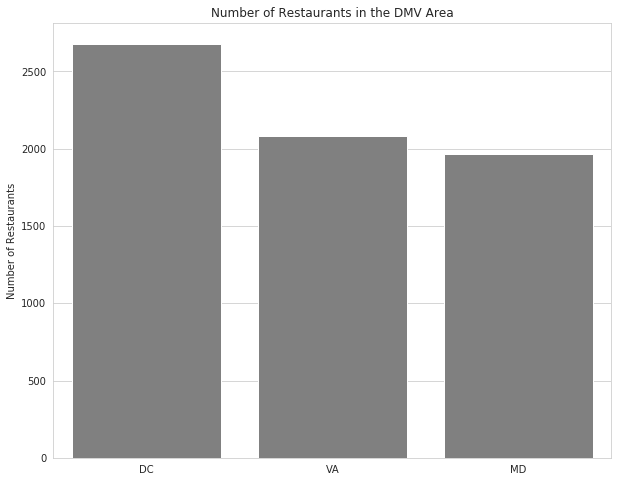

In [14]:
state_count = df.state.value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(state_count.index, state_count.values, color="grey")
plt.title("Number of Restaurants in the DMV Area")
plt.ylabel("Number of Restaurants")
plt.show()

Nice! Enough data for each group.

Get rid of location column:

In [15]:
df.drop(columns=["location"], inplace=True, axis=1)

In [16]:
df.head()

,categories,hours,id,name,price,rating,review_count,special_hours,state
0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,$$,3.5,372,NaN,MD
1,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,$$,3.5,192,NaN,VA
2,"[{'alias': 'breakfast_brunch', 'title': 'Break...","[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,IHOP,$$,2.5,125,NaN,MD
3,"[{'alias': 'seafood', 'title': 'Seafood'}]",NaN,-34232Z9Njha7auSGehjdQ,Capitol Seafood & Crab,$,4.0,13,NaN,MD
4,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...","[{'open': [{'is_overnight': False, 'start': '0...",-34O36suTEIwy0DIvpW8PA,Dunkin’ Donuts,$,4.5,2,NaN,VA


### Cuisines

Study each area's most popular cuisines:

In [17]:
df["cuisines"] = df.categories.apply(lambda x: "|".join([i["title"] for i in x]))

Get rid of categories column:

In [18]:
df.drop(columns=["categories"], inplace=True, axis=1)

In [19]:
df.head()

,hours,id,name,price,rating,review_count,special_hours,state,cuisines
0,"[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,$$,3.5,372,NaN,MD,Salad|Seafood|American (Traditional)
1,"[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,$$,3.5,192,NaN,VA,Pizza|American (New)|Salad
2,"[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,IHOP,$$,2.5,125,NaN,MD,Breakfast & Brunch|American (Traditional)|Burgers
3,NaN,-34232Z9Njha7auSGehjdQ,Capitol Seafood & Crab,$,4.0,13,NaN,MD,Seafood
4,"[{'open': [{'is_overnight': False, 'start': '0...",-34O36suTEIwy0DIvpW8PA,Dunkin’ Donuts,$,4.5,2,NaN,VA,Donuts|Coffee & Tea|Breakfast & Brunch


Split data, state wise:

In [20]:
dc = df[df.state == "DC"]
dc.shape

(2679, 9)

In [21]:
va = df[df.state == "VA"]
va.shape

(2081, 9)

In [22]:
md = df[df.state == "MD"]
md.shape

(1968, 9)

**DC**

Total number of reviews for each cuisine:

In [23]:
dc_sum_review_by_cuisine = dc.groupby("cuisines")["review_count"].sum()

In [24]:
dc_sum_review_by_cuisine.sort_values(ascending=False).head()

cuisines
American (Traditional)|Coffee & Tea|Breakfast & Brunch    12832
Italian                                                   11338
Pizza                                                     11311
Indian                                                     9930
Bars|American (Traditional)|Breakfast & Brunch             9676
Name: review_count, dtype: int64

Total number of restaurants for each cuisine:

In [25]:
dc_count_by_cuisine = dc.groupby("cuisines")["review_count"].count()

In [26]:
dc_count_by_cuisine.sort_values(ascending=False).head()

cuisines
Pizza                   84
Chinese                 79
Sandwiches|Fast Food    50
American (New)          50
Mexican                 40
Name: review_count, dtype: int64

In [27]:
# dc.groupby("cuisines")["review_count"].sum().head(10)

In [28]:
# dc.groupby("cuisines")["review_count"].count().head(10)

"Standardized" number of reviews for each cuisine:

In [29]:
dc_std_sum_review_by_cuisine = dc_sum_review_by_cuisine / dc_count_by_cuisine

In [30]:
dc_std_sum_review_by_cuisine.sort_values(ascending=False).head()

cuisines
American (Traditional)|Coffee & Tea|Breakfast & Brunch    12832.000000
Hot Dogs|Burgers|American (Traditional)                    3672.000000
American (New)|Breakfast & Brunch|Vegetarian               3418.000000
Bars|American (Traditional)|Breakfast & Brunch             3225.333333
Brasseries|French|Breakfast & Brunch                       3153.000000
Name: review_count, dtype: float64

Two-sample t-test -> { American (Traditional)|Coffee & Tea|Breakfast & Brunch } and { Hot Dogs|Burgers|American (Traditional) }

**VA**

Total number of reviews for each cuisine:

In [31]:
va_sum_review_by_cuisine = va.groupby("cuisines")["review_count"].sum()

In [32]:
va_sum_review_by_cuisine.sort_values(ascending=False).head()

cuisines
Vietnamese    11490
Thai           8685
Chinese        7355
Mexican        6012
Indian         4910
Name: review_count, dtype: int64

Total number of restaurants for each cuisine:

In [33]:
va_count_by_cuisine = va.groupby("cuisines")["review_count"].count()

In [34]:
va_count_by_cuisine.sort_values(ascending=False).head()

cuisines
Chinese                 57
Pizza                   57
Vietnamese              50
Sandwiches|Fast Food    47
Thai                    34
Name: review_count, dtype: int64

In [35]:
# va.groupby("cuisines")["review_count"].sum().head(10)

In [36]:
# va.groupby("cuisines")["review_count"].count().head(10)

"Standardized" number of reviews for each cuisine:

In [37]:
va_std_sum_review_by_cuisine = va_sum_review_by_cuisine / va_count_by_cuisine

In [38]:
va_std_sum_review_by_cuisine.sort_values(ascending=False).head()

cuisines
Pizza|Italian|Gelato                      1798.0
Bars|American (New)|Breakfast & Brunch    1781.0
Halal|Pakistani                           1770.0
American (Traditional)|Seafood            1763.0
Cajun/Creole|Seafood|Bars                 1738.0
Name: review_count, dtype: float64

Two-sample t-test -> { Pizza|Italian|Gelato } and { Bars|American (New)|Breakfast & Brunch }

**MD**

Total number of reviews for each cuisine:

In [39]:
md_sum_review_by_cuisine = md.groupby("cuisines")["review_count"].sum()

In [40]:
md_sum_review_by_cuisine.sort_values(ascending=False).head()

cuisines
Pizza                     4105
Thai                      3737
Chinese                   3421
Mexican                   3334
American (Traditional)    2916
Name: review_count, dtype: int64

Total number of restaurants for each cuisine:

In [41]:
md_count_by_cuisine = md.groupby("cuisines")["review_count"].count()

In [42]:
md_count_by_cuisine.sort_values(ascending=False).head()

cuisines
Chinese                           95
Pizza                             63
Sandwiches|Fast Food              51
Mexican                           42
Fast Food|Burgers|Coffee & Tea    38
Name: review_count, dtype: int64

In [43]:
# md.groupby("cuisines")["review_count"].sum().head(10)

In [44]:
# md.groupby("cuisines")["review_count"].count().head(10)

"Standardized" number of reviews for each cuisine:

In [45]:
md_std_sum_review_by_cuisine = md_sum_review_by_cuisine / md_count_by_cuisine

In [46]:
md_std_sum_review_by_cuisine.sort_values(ascending=False).head()

cuisines
American (New)|Breakfast & Brunch|Bars                     2026.0
Breakfast & Brunch|Cafes                                   1680.0
Southern|American (Traditional)|Breakfast & Brunch         1253.0
Breakfast & Brunch|American (Traditional)|Mediterranean    1106.0
Pizza|American (New)|Breakfast & Brunch                    1046.0
Name: review_count, dtype: float64

Two-sample t-test -> { American (New)|Breakfast & Brunch|Bars } and { Breakfast & Brunch|Cafes }